<a href="https://colab.research.google.com/github/ashish-AIML/AI-ML-Projects/blob/master/Week0_09_FindNeighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
### Python at Work

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W0_SUN_EXP_9" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/X1X2.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/X1X2L.csv")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ls

BLR_M1W0_SUN_EXP_8.ipynb  Week0-full_gender_height_weight.csv  X1X2L.csv
BLR_M1W0_SUN_EXP_9.ipynb  Week0-part_gender_height_weight.csv  X1X2L.csv.1
drive/                    X1X2.csv
sample_data/              X1X2.csv.1


In [0]:
!cp X1X2.csv drive/My\ Drive\

In [0]:
ls drive/My\ Drive\

'1 (1).ipynb'
 1.2.gsheet
 1.2.xls
 1.3.gsheet
 1.3.xls
 1.4.gsheet
 1.4.xls
 1.6.gsheet
 1.6.xls
 2018_04_07_Session11/
'AIML_210618 (1).csv.gsheet'
 AIML_210618.csv
 AIML_210618.csv.gsheet
 AIML-3/
 AIML_Accident_severity.gsheet
 AIML_Accident_severity.ods
'AIML Attendance, ChatBot & CFU% (1).xlsx'
'AIML Attendance, ChatBot & CFU% (1).xlsx.gsheet'
'AIML Attendance, ChatBot & CFU%.gsheet'
'AIML Attendance & Score Sheet  (1).xlsx.gsheet'
'AIML Attendance & Score Sheet  (2).xlsx.gsheet'
'AIML Attendance & Score Sheet  (4) (1).xlsx'
'AIML Attendance & Score Sheet  (4) (1).xlsx.gsheet'
'AIML Attendance & Score Sheet  (4) (2).xlsx'
'AIML Attendance & Score Sheet  (4) (2).xlsx.gsheet'
'AIML Attendance & Score Sheet  (4) (3).xlsx.gsheet'
'AIML Attendance & Score Sheet  (4) (4).xlsx.gsheet'
'AIML Attendance & Score Sheet  (4) (5).xlsx.gsheet'
'AIML Attendance & Score Sheet  (4) (6).xlsx.gsheet'
'AIML Attendance & Score Sheet  (4).xlsx'
'AIML Attendance & Score Sheet  (4).xlsx.gsheet'
'AIML At

In [0]:
import numpy as np 
import pandas as pd
import math

In [0]:
data = pd.read_csv('X1X2.csv')

In [0]:
data

,X1,X2
0,2.5,3.5
1,4.0,5.0
2,2.1,3.1
3,3.8,4.8
4,2.6,3.6
5,3.9,4.9
6,2.3,3.3
7,4.1,5.1
8,2.1,3.1
9,3.7,4.7


In [0]:
def dist(a, b):
    sqSum = 0
    for i in range(len(a)):
        sqSum += (a[i] - b[i]) ** 2
    return math.sqrt(sqSum)

In [0]:
def find_distance(point1, data_array):
    distance = []
    for point2 in data_array:
        distance.append(dist(point1, point2))
    return np.array(distance)

In [0]:
distance

[]

In [0]:
def nearest_points(distances, k):
    return np.argsort(distances)[:k]

In [0]:
k = 1
for point1 in data.values:
    distances = find_distance(point1, data.values)
    print("{} Nearest points for the point X1 : {} X2 : {} are \n".format(k, point1[0], point1[1]))
    print(data.loc[nearest_points(distances,k)])
    print('\n')

1 Nearest points for the point X1 : 2.5 X2 : 3.5 are 

    X1   X2
0  2.5  3.5


1 Nearest points for the point X1 : 4.0 X2 : 5.0 are 

    X1   X2
1  4.0  5.0


1 Nearest points for the point X1 : 2.1 X2 : 3.1 are 

    X1   X2
2  2.1  3.1


1 Nearest points for the point X1 : 3.8 X2 : 4.8 are 

    X1   X2
3  3.8  4.8


1 Nearest points for the point X1 : 2.6 X2 : 3.6 are 

    X1   X2
4  2.6  3.6


1 Nearest points for the point X1 : 3.9 X2 : 4.9 are 

    X1   X2
5  3.9  4.9


1 Nearest points for the point X1 : 2.3 X2 : 3.3 are 

    X1   X2
6  2.3  3.3


1 Nearest points for the point X1 : 4.1 X2 : 5.1 are 

    X1   X2
7  4.1  5.1


1 Nearest points for the point X1 : 2.1 X2 : 3.1 are 

    X1   X2
2  2.1  3.1


1 Nearest points for the point X1 : 3.7 X2 : 4.7 are 

    X1   X2
9  3.7  4.7




2 Nearest points for the point X1 : 2.5 X2 : 3.5 are 

    X1   X2
0  2.5  3.5
4  2.6  3.6


2 Nearest points for the point X1 : 4.0 X2 : 5.0 are 

    X1   X2
1  4.0  5.0
7  4.1  5.1


2 Nearest points for the point X1 : 2.1 X2 : 3.1 are 

    X1   X2
2  2.1  3.1
8  2.1  3.1


2 Nearest points for the point X1 : 3.8 X2 : 4.8 are 

    X1   X2
3  3.8  4.8
9  3.7  4.7


2 Nearest points for the point X1 : 2.6 X2 : 3.6 are 

    X1   X2
4  2.6  3.6
0  2.5  3.5


2 Nearest points for the point X1 : 3.9 X2 : 4.9 are 

    X1   X2
5  3.9  4.9
1  4.0  5.0


2 Nearest points for the point X1 : 2.3 X2 : 3.3 are 

    X1   X2
6  2.3  3.3
2  2.1  3.1


2 Nearest points for the point X1 : 4.1 X2 : 5.1 are 

    X1   X2
7  4.1  5.1
1  4.0  5.0


2 Nearest points for the point X1 : 2.1 X2 : 3.1 are 

    X1   X2
2  2.1  3.1
8  2.1  3.1


2 Nearest points for the point X1 : 3.7 X2 : 4.7 are 

    X1   X2
9  3.7  4.7
3  3.8  4.8




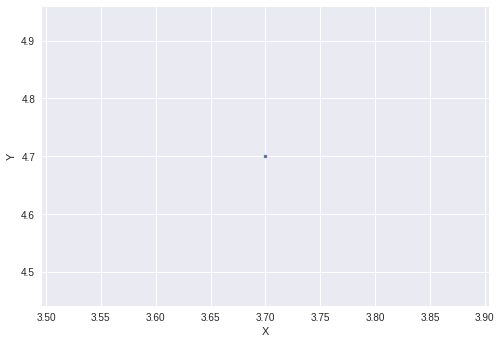

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

k = 2
for point1 in data.values:
    distances = find_distance(point1, data.values)
    print("{} Nearest points for the point X1 : {} X2 : {} are \n".format(k, point1[0], point1[1]))
    print(data.loc[nearest_points(distances,k)])
    print('\n')
data = pd.read_csv('X1X2.csv')
plt.plot(point1[0], point1[1], '.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Practice: 
 * Confirm by printing distances along with X1 and X2
 * Plot the points and visually verify

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")